In [1]:
import pandas as pd

In [2]:
pd.options.display.width= None
pd.options.display.max_columns= None
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_columns', 3000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_excel('datasets/odas.xlsx')
df.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
0,09-05-2024,9.40,9.29,9.51,9.40,403906515,1400,32.2350,10269,13160,408,10333.0,321.0
1,08-05-2024,9.38,9.36,9.62,9.48,602098611,1400,32.2650,10248,13132,407,10311.0,320.0
2,07-05-2024,9.39,9.24,9.68,9.44,755787891,1400,32.2653,10337,13146,407,10322.0,320.0
3,06-05-2024,9.63,9.60,10.11,9.83,1244211925,1400,32.2822,10267,13482,418,10586.0,328.0
4,03-05-2024,10.00,9.91,10.15,10.03,766361498,1400,32.3053,10277,14000,433,10993.0,340.0


In [5]:
df.index = pd.to_datetime(df["Tarih"], format='%d-%m-%Y')
df.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
Tarih,,,,,,,,,,,,,
2024-05-09,09-05-2024,9.40,9.29,9.51,9.40,403906515,1400,32.2350,10269,13160,408,10333.0,321.0
2024-05-08,08-05-2024,9.38,9.36,9.62,9.48,602098611,1400,32.2650,10248,13132,407,10311.0,320.0
2024-05-07,07-05-2024,9.39,9.24,9.68,9.44,755787891,1400,32.2653,10337,13146,407,10322.0,320.0
2024-05-06,06-05-2024,9.63,9.60,10.11,9.83,1244211925,1400,32.2822,10267,13482,418,10586.0,328.0
2024-05-03,03-05-2024,10.00,9.91,10.15,10.03,766361498,1400,32.3053,10277,14000,433,10993.0,340.0


In [169]:
df_copy=df.copy()

In [170]:
start_date = '2015-01-01'
end_date = '2024-08-05'
filtered_df = df_copy[(df_copy.index >= start_date) & (df_copy.index <= end_date)]
filtered_df.head()

,Tarih,Kapanış(TL),Min(TL),Max(TL),AOF(TL),Hacim(TL),Sermaye(mn TL),USDTRY,BIST 100,PiyasaDeğeri(mn TL),PiyasaDeğeri(mn USD),HalkaAçık PD(mn TL),HalkaAçık PD(mn USD)
Tarih,,,,,,,,,,,,,
2024-05-09,09-05-2024,9.40,9.29,9.51,9.40,403906515,1400,32.2350,10269,13160,408,10333.0,321.0
2024-05-08,08-05-2024,9.38,9.36,9.62,9.48,602098611,1400,32.2650,10248,13132,407,10311.0,320.0
2024-05-07,07-05-2024,9.39,9.24,9.68,9.44,755787891,1400,32.2653,10337,13146,407,10322.0,320.0
2024-05-06,06-05-2024,9.63,9.60,10.11,9.83,1244211925,1400,32.2822,10267,13482,418,10586.0,328.0
2024-05-03,03-05-2024,10.00,9.91,10.15,10.03,766361498,1400,32.3053,10277,14000,433,10993.0,340.0


In [171]:
df_new_drop = df_copy.drop(["Tarih", "Min(TL)","Max(TL)","AOF(TL)","Hacim(TL)","Sermaye(mn TL)","USDTRY","BIST 100","PiyasaDeğeri(mn TL)","PiyasaDeğeri(mn USD)","HalkaAçık PD(mn TL)","HalkaAçık PD(mn USD)"], axis='columns')
df_new_drop.head()

,Kapanış(TL)
Tarih,
2024-05-09,9.40
2024-05-08,9.38
2024-05-07,9.39
2024-05-06,9.63
2024-05-03,10.00


In [172]:
df_new_drop["Kapanış(TL)"]=df_new_drop["Kapanış(TL)"].astype(float)

In [173]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [40, 15]
%matplotlib inline

Text(0.5, 1.0, 'Kapanış(TL)')

<Figure size 4000x1500 with 0 Axes>

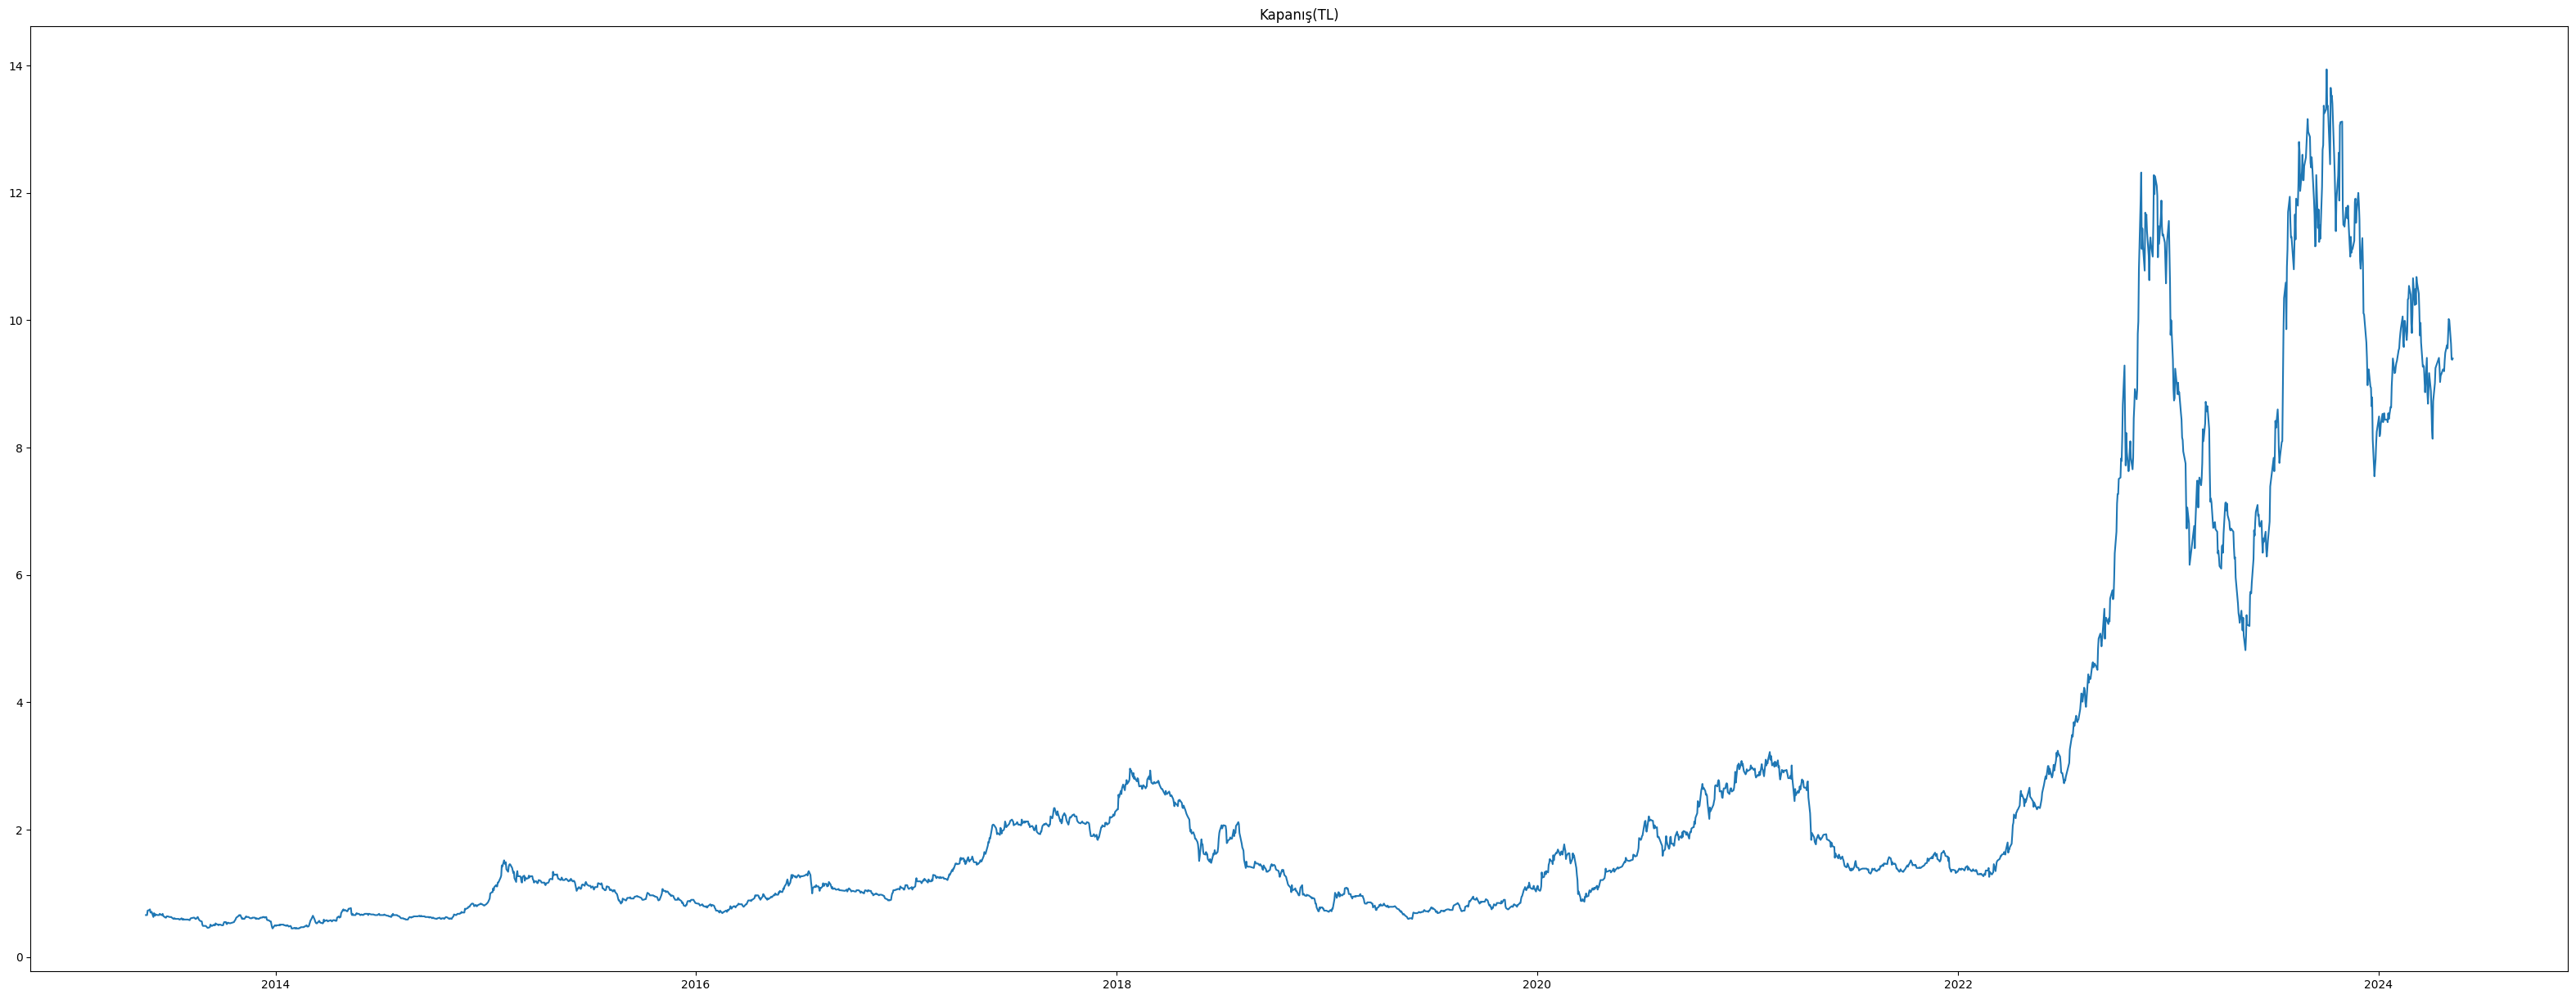

In [174]:
plt.figure()
fig, ax = plt.subplots()
ax.plot(df_new_drop.index,df_new_drop["Kapanış(TL)"])
ax.set_title ('Kapanış(TL)')

In [175]:
len(df_new_drop)

2750

In [176]:
df_new_drop.isna().sum()

Kapanış(TL)    0
dtype: int64

In [177]:
df_new_drop=df_new_drop.interpolate(axis=0)
df_new_drop.isna().sum()

Kapanış(TL)    0
dtype: int64

Text(0.5, 1.0, 'Kapanış(TL)')

<Figure size 1500x600 with 0 Axes>

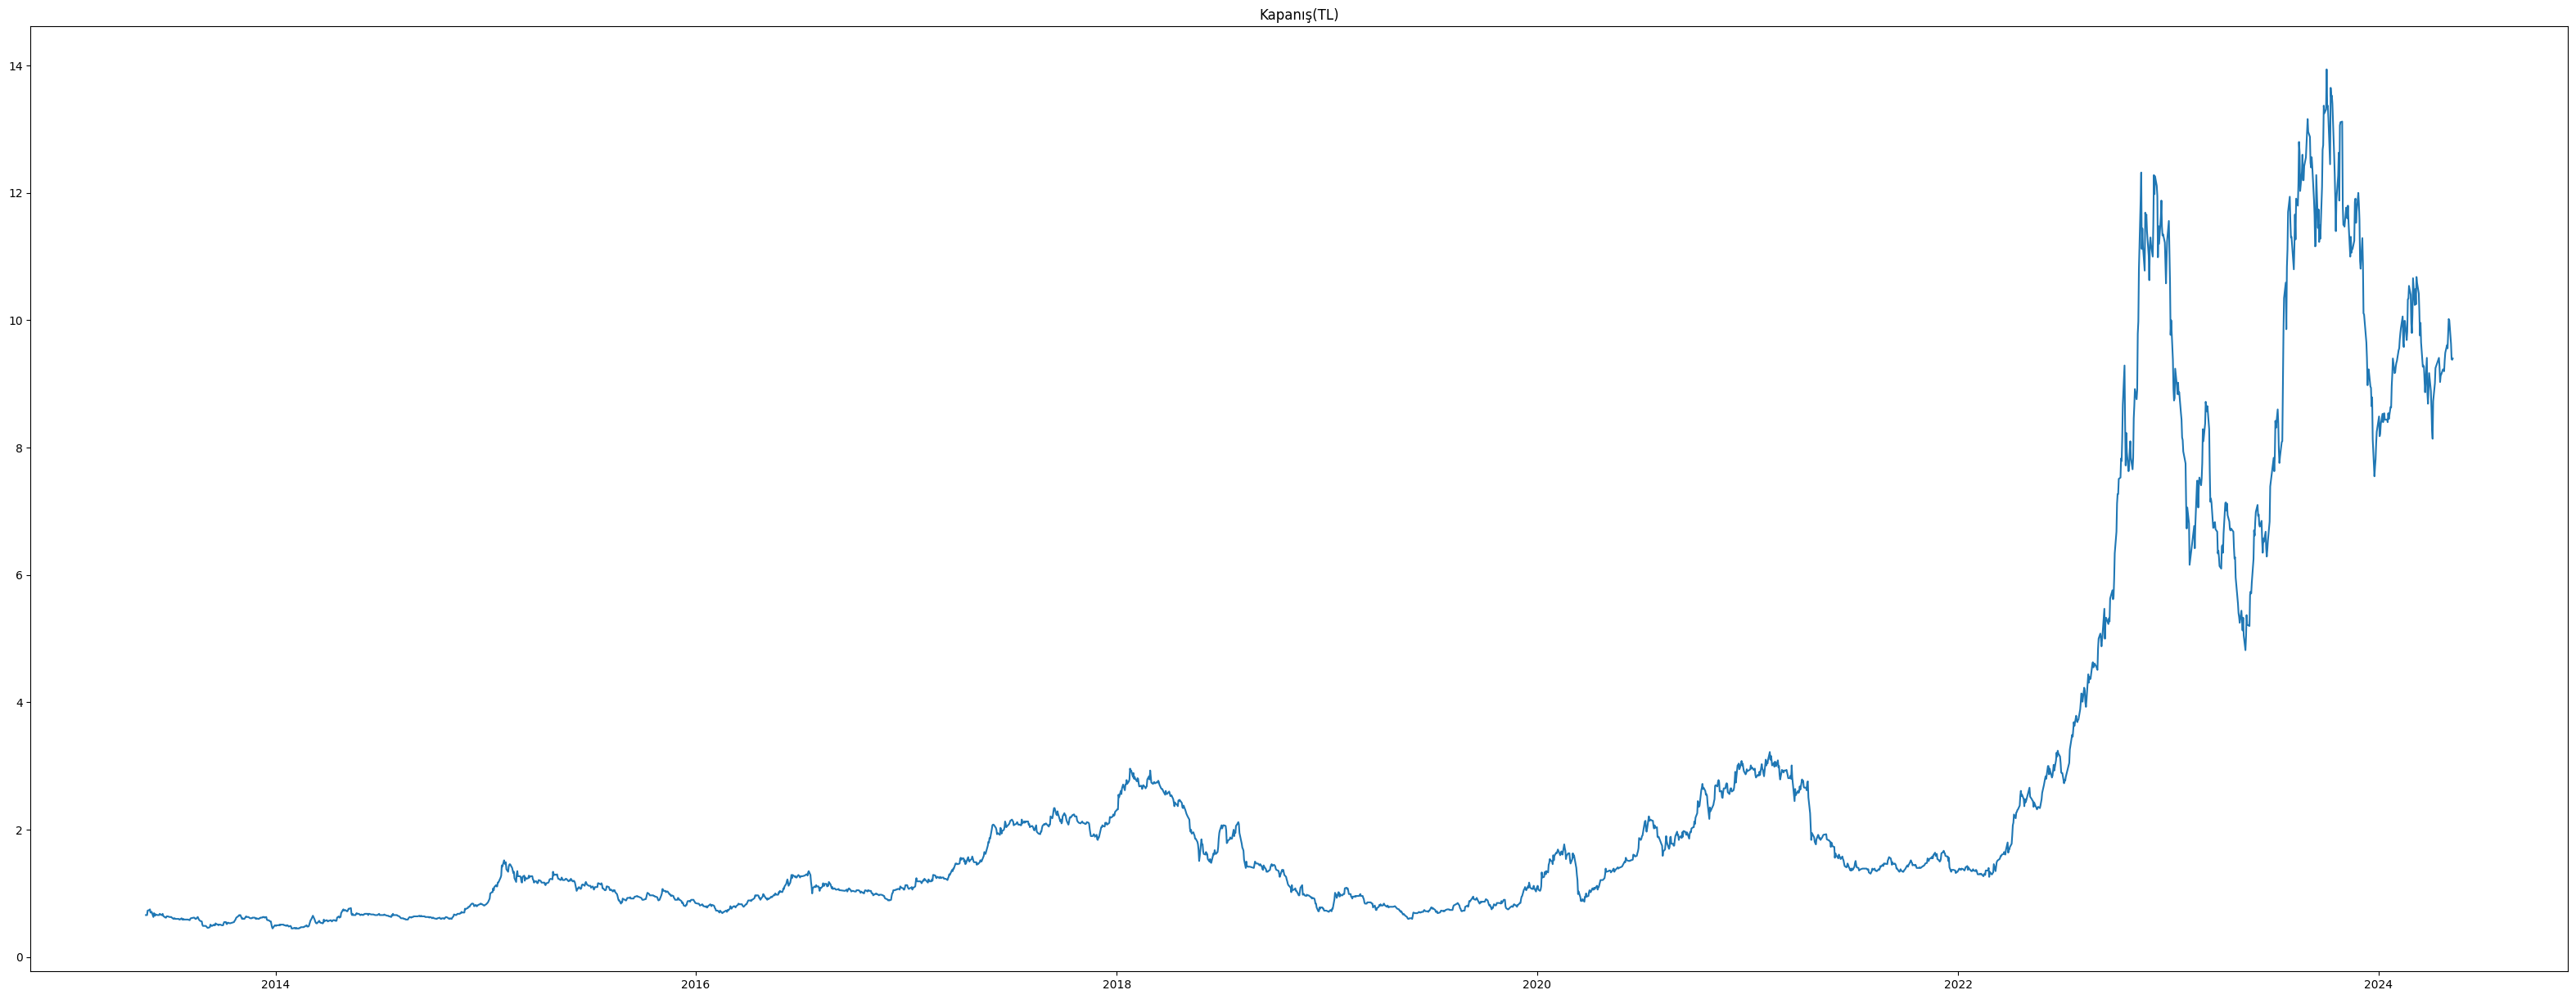

In [178]:
plt.figure(figsize=(15, 6))
fig, ax = plt.subplots()
ax.plot(df_new_drop.index,df_new_drop["Kapanış(TL)"])
ax.set_title ('Kapanış(TL)')

In [180]:
df_final=df_new_drop.reset_index()
df_final = df_final.apply(lambda x: x[::-1])
df_final=df_final.reset_index()
df_final.head()

,index,Tarih,Kapanış(TL)
0,2749,2013-05-21,0.66
1,2748,2013-05-22,0.66
2,2747,2013-05-23,0.66
3,2746,2013-05-24,0.73
4,2745,2013-05-27,0.74


In [181]:
df_final.head()

,index,Tarih,Kapanış(TL)
0,2749,2013-05-21,0.66
1,2748,2013-05-22,0.66
2,2747,2013-05-23,0.66
3,2746,2013-05-24,0.73
4,2745,2013-05-27,0.74


Text(0.5, 1.0, 'Kapanış(TL)')

<Figure size 1500x600 with 0 Axes>

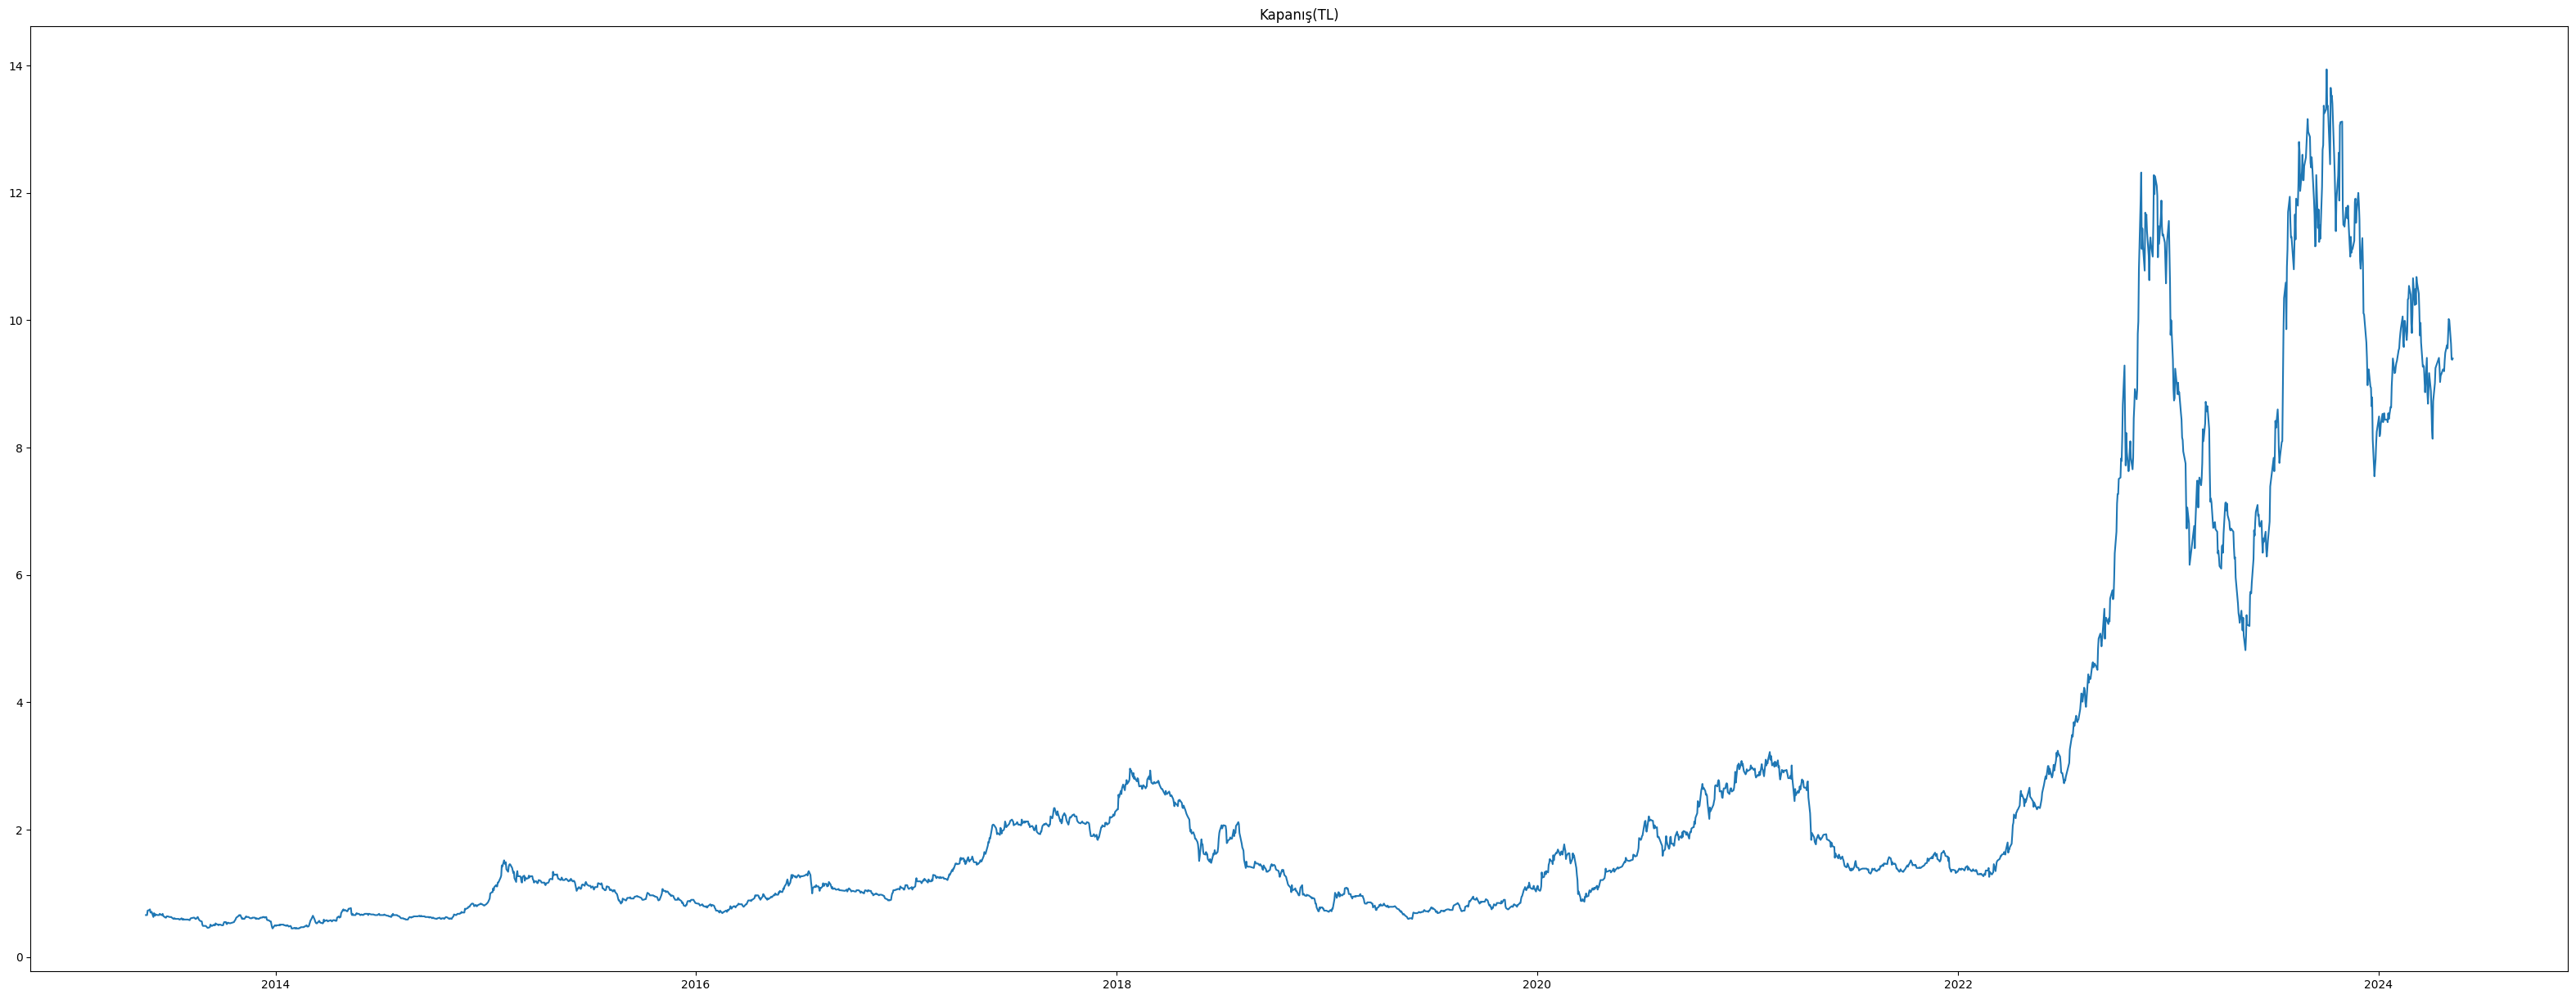

In [182]:
plt.figure(figsize=(15, 6))
fig, ax = plt.subplots()
ax.plot(df_new_drop.index,df_new_drop["Kapanış(TL)"])
ax.set_title ('Kapanış(TL)')

In [183]:
dt_arr=np.array(df_final["Kapanış(TL)"])
dt_arr

array([0.66, 0.66, 0.66, ..., 9.39, 9.38, 9.4 ])

In [184]:
from keras.preprocessing.sequence import TimeseriesGenerator
train, test = dt_arr[0:round(0.90*len(dt_arr))], dt_arr[round(0.90*len(dt_arr)):]
window_size=42
batch_size=32
train_generator = TimeseriesGenerator(train, train, length=window_size, batch_size=batch_size)
test_generator = TimeseriesGenerator(test, test, length=window_size, batch_size=batch_size)

# Eğitim veri setinden X_train ve y_train'i al
X_train = []
y_train = []
for i in range(len(train_generator)):
    X_batch, y_batch = train_generator[i]
    X_train.extend(X_batch)
    y_train.extend(y_batch)

# Test veri setinden X_test ve y_test'i al
X_test = []
y_test = []
for i in range(len(test_generator)):
    X_batch, y_batch = test_generator[i]
    X_test.extend(X_batch)
    y_test.extend(y_batch)

# Sonuçları numpy dizilerine dönüştür
X_train_LSTM = np.array(X_train)
y_train_LSTM = np.array(y_train)
X_test_LSTM = np.array(X_test)
y_test_LSTM = np.array(y_test)

X_train,y_train=X_train_LSTM.reshape(X_train_LSTM.shape[0], -1),y_train_LSTM.reshape(y_train_LSTM.shape[0], -1)
X_test,y_test=X_test_LSTM.reshape(X_test_LSTM.shape[0], -1),y_test_LSTM.reshape(y_test_LSTM.shape[0], -1)

print(X_train.shape)
print(X_test.shape)

(2433, 42)
(233, 42)


In [185]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras import layers
from keras import backend as K
import keras
from keras.callbacks import ModelCheckpoint,EarlyStopping

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow import keras


from sklearn.model_selection import GridSearchCV,train_test_split,TimeSeriesSplit

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn import metrics

from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import seaborn as sn
import pathlib
from IPython.display import clear_output


from sklearn.svm import SVR
import numpy as np
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [186]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
    
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

class PlotLearning(Callback):
    """
    Callback to plot the learning curves of the model during training.
    """
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []
            

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]
        
        # Plotting
        metrics = [x for x in logs if 'val' not in x]
        
        f, axs = plt.subplots(1, len(metrics), figsize=(15,5))
        clear_output(wait=True)
        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2), 
                        self.metrics[metric], 
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2), 
                            self.metrics['val_' + metric], 
                            label='val_' + metric)
                
            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()



In [209]:
results=pd.DataFrame(columns = ['Model', 'Dataset', 'MAE','MSE','RMSE','R2','Window','Batch_size','Patience'])

In [188]:
from sklearn.linear_model import Ridge

In [189]:
model_params = {
        'params': {
            'alpha': np.logspace(-30, 0, 30),
            'max_iter':  [100,1000,10000,100000]
        }
    }

ridge = Ridge()
ridge_grid = GridSearchCV(ridge, model_params["params"], scoring='neg_mean_squared_error',cv=5,verbose=True)
ridge_grid.fit(X_train, y_train)
print(ridge_grid.best_params_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
{'alpha': 4.175318936560426e-12, 'max_iter': 100}


In [190]:
ridge = Ridge(alpha=4.175318936560426e-128,max_iter=100)  
ridge.fit(X_train, y_train)

Ridge(alpha=4.175318936560426e-128, max_iter=100)

In [212]:
train_predict=ridge.predict(X_train)
test_predict=ridge.predict(X_test)

mae,mse,rmse,r2_test=evaluate(test_predict,y_test)
results = pd.concat([results,
                     pd.DataFrame([{
                         'Model':'Ridge',
                         'Dataset':'Test',
                         'MAE':mae,
                         'MSE':mse,
                         'RMSE':rmse,
                         'R2':r2_test,
                         'Window':window_size,
                         'Batch_size':batch_size,
                         'Patience':15
                     }])], ignore_index=True)

mae,mse,rmse,r2=evaluate(train_predict,y_train)
results = pd.concat([results,
                     pd.DataFrame([{
                         'Model':'Ridge',
                         'Dataset':'Train',
                         'MAE':mae,
                         'MSE':mse,
                         'RMSE':rmse,
                         'R2':r2,
                         'Window':window_size,
                         'Batch_size':batch_size,
                         'Patience':15
                     }])], ignore_index=True)
results

,Model,Dataset,MAE,MSE,RMSE,R2,Window,Batch_size,Patience
0,Ridge,Test,0.278452,0.134880,0.367260,0.960567,42,32,15
1,Ridge,Train,0.047997,0.009453,0.097228,0.997370,42,32,15
2,Ridge,Test,0.278452,0.134880,0.367260,0.997370,42,32,15
3,Ridge,Train,0.047997,0.009453,0.097228,0.997370,42,32,15
4,Ridge,Test,0.278452,0.134880,0.367260,0.960567,42,32,15
5,Ridge,Train,0.047997,0.009453,0.097228,0.997370,42,32,15


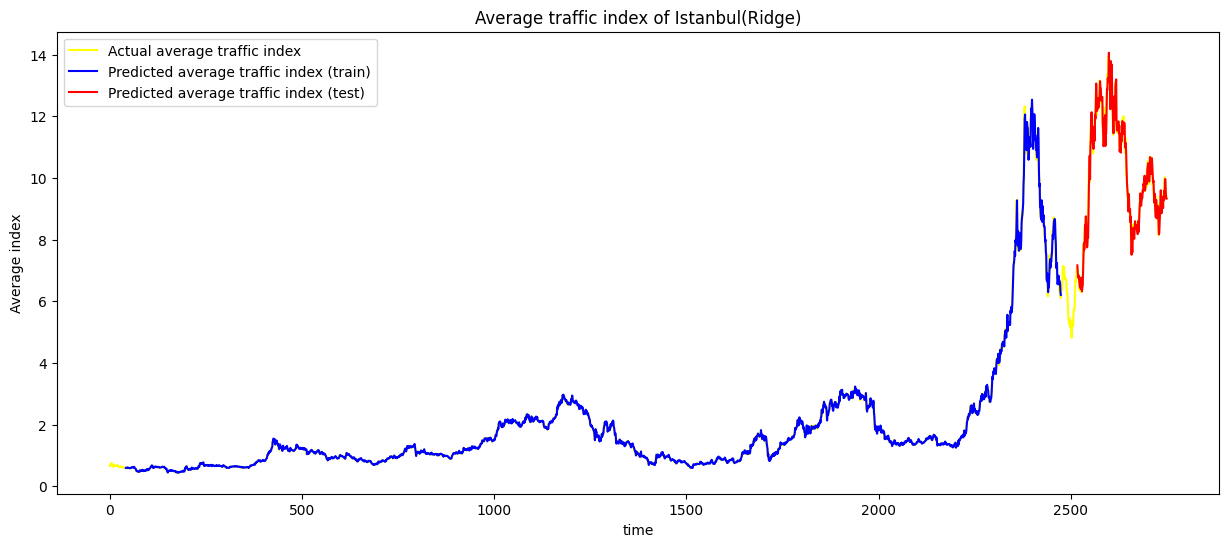

In [213]:
plt.figure(figsize=(15, 6))
plt.plot(df_final["Kapanış(TL)"], color='yellow', label="Actual average traffic index")

# Shifting the x-values for the second plot by 60 for training data
shifted_train_predict_values = np.arange(len(train_predict)) + window_size
plt.plot(shifted_train_predict_values, train_predict, color='blue', label="Predicted average traffic index (train)")

# Shifting the x-values for the third plot by 120 for test data
shifted_test_predict_values = np.arange(len(test_predict)) + len(train_predict) + 2*window_size
test_predict_inverse_flattened = test_predict.flatten()  # Flatten test_predict_inverse
plt.plot(shifted_test_predict_values, test_predict, color='red', label="Predicted average traffic index (test)")

plt.title("Average traffic index of Istanbul(Ridge)")
plt.xlabel("time")
plt.ylabel("Average index")
plt.legend()
plt.show()

In [214]:
import plotly.offline as py
import plotly.graph_objs as go

In [215]:
actual_trace = go.Scatter(
    x=df_new_drop.tail(len(test_predict)).index,
    y=y_test.flatten(),
    mode='lines',
    name="Gerçek ODAS Tarihsel Fiyat Bilgileri",
    line=dict(color='red')
)

test_actual_trace = go.Scatter(
    x=df_new_drop.tail(len(test_predict)).index,
    y=test_predict.flatten(),
    mode='lines',
    name="Tahmin edilen ODAS Tarihsel Fiyat Bilgileri",
    line=dict(color='blue')
)

data = [actual_trace, test_actual_trace]

layout = go.Layout(
    title="ODAS Tarihsel Fiyat Bilgileri",
    xaxis=dict(title="Tarih"),
    yaxis=dict(title="Fiyat Bilgileri"),
    legend=dict(x=0, y=1)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
print("Doğruluk:",r2_test*100)

Doğruluk: 96.0567230205994


In [216]:
test_Akcay=ridge.predict(X_test[-1].reshape(1,-1))

In [217]:
test_Akcay[0][0]

9.327224344148982

In [218]:
y_test[-1]

array([9.4])

In [219]:
X_test[-1]

array([10.49, 10.25, 10.68, 10.59, 10.42, 10.14,  9.76,  9.96,  9.65,
        9.27,  9.29,  9.27,  9.05,  8.87,  9.41,  8.85,  8.69,  8.91,
        9.17,  8.89,  8.62,  8.28,  8.14,  8.73,  9.01,  9.25,  9.41,
        9.27,  9.03,  9.13,  9.15,  9.23,  9.2 ,  9.37,  9.49,  9.61,
        9.56, 10.02, 10.  ,  9.63,  9.39,  9.38])

In [220]:
projection=40

data_projection=X_test[-1]
data_projection = np.roll(data_projection, -1)
data_projection[-1] = y_test[-1]
data_projection_control=data_projection
print(data_projection_control)

[10.25 10.68 10.59 10.42 10.14  9.76  9.96  9.65  9.27  9.29  9.27  9.05
  8.87  9.41  8.85  8.69  8.91  9.17  8.89  8.62  8.28  8.14  8.73  9.01
  9.25  9.41  9.27  9.03  9.13  9.15  9.23  9.2   9.37  9.49  9.61  9.56
 10.02 10.    9.63  9.39  9.38  9.4 ]


C:\Users\Administrator\AppData\Local\Temp\ipykernel_13136\2552776792.py:5: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [221]:
for i in range(0,projection):
    print(data_projection)
    test_Akcay=ridge.predict(data_projection.reshape(1,-1))
    data_projection = np.roll(data_projection, -1)
    data_projection[-1] = test_Akcay[0]
data_projection[-projection:]

[10.25 10.68 10.59 10.42 10.14  9.76  9.96  9.65  9.27  9.29  9.27  9.05
  8.87  9.41  8.85  8.69  8.91  9.17  8.89  8.62  8.28  8.14  8.73  9.01
  9.25  9.41  9.27  9.03  9.13  9.15  9.23  9.2   9.37  9.49  9.61  9.56
 10.02 10.    9.63  9.39  9.38  9.4 ]
[10.68       10.59       10.42       10.14        9.76        9.96
  9.65        9.27        9.29        9.27        9.05        8.87
  9.41        8.85        8.69        8.91        9.17        8.89
  8.62        8.28        8.14        8.73        9.01        9.25
  9.41        9.27        9.03        9.13        9.15        9.23
  9.2         9.37        9.49        9.61        9.56       10.02
 10.          9.63        9.39        9.38        9.4         9.66302003]
[10.59       10.42       10.14        9.76        9.96        9.65
  9.27        9.29        9.27        9.05        8.87        9.41
  8.85        8.69        8.91        9.17        8.89        8.62
  8.28        8.14        8.73        9.01        9.25        9.41

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13136\2176809018.py:5: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13136\2176809018.py:5: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13136\2176809018.py:5: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13136\2176809018.py:5: DeprecationWarning:

Conversion

array([9.66302003, 9.72944731, 9.6183554 , 9.73745531, 9.67823961,
       9.48365312, 9.3685143 , 9.49751298, 9.52138561, 9.5809878 ,
       9.67857288, 9.74648978, 9.76688059, 9.75574876, 9.7596294 ,
       9.67182379, 9.6259082 , 9.5790709 , 9.55068709, 9.62030455,
       9.7081887 , 9.67905784, 9.61183009, 9.59759082, 9.54779604,
       9.41960192, 9.34664459, 9.3477811 , 9.38499852, 9.36830018,
       9.40423709, 9.36096609, 9.30755429, 9.2876856 , 9.22200455,
       9.10838804, 9.12209808, 9.16121948, 9.11966731, 9.1528346 ])

In [222]:
arr_scaled=np.array(data_projection_control).reshape(-1,1)

In [223]:
data_projection_scaled=np.array(data_projection[-projection:]).reshape(-1,1)

In [224]:
final_arr = np.concatenate((np.squeeze(data_projection_control), np.squeeze(data_projection_scaled)))

In [225]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

# Get the start date from the DataFrame
start_date = df_final.iloc[-1]["Tarih"]
# Calculate the end date by adding projection and window_size
end_date = start_date + DateOffset(days=(projection+2*(projection//5)))

# Create a date range
date_range = pd.date_range(start=start_date, end=end_date)

# Filter out weekends and ensure the length is len(final_arr)
weekdays = date_range[date_range.dayofweek < 5][:len(final_arr)]

# Remove the start date from the weekdays if it's present
if len(weekdays) > 0 and weekdays[0] == start_date:
    weekdays = weekdays[1:]

# Create a DataFrame with the date data
df_dates = pd.DataFrame({'Tarih': weekdays})

In [226]:
df_final_subset = df_final.iloc[-(window_size):]["Tarih"]
df_final_subset = df_final_subset.to_frame()

# Concatenate df_final_subset and df_dates along rows
df_res = pd.concat([df_final_subset, df_dates], ignore_index=True)

In [227]:
df_res.insert(1, "Values", final_arr, True)

In [228]:
import plotly.graph_objs as go

actual_trace = go.Scatter(
    x=df_res["Tarih"].iloc[:window_size],
    y=df_res["Values"].iloc[:window_size],
    mode='markers',
    name="Geçmiş ODAS Verileri",
    line=dict(color='blue')
)

test_actual_trace = go.Scatter(
    x=df_res["Tarih"].iloc[window_size:],
    y=df_res["Values"].iloc[window_size:],
    mode='markers',
    name=f"{projection} Günlük ODAS Tahmin",
    line=dict(color='red')
)

total_trace = go.Scatter(
    x=df_res["Tarih"],
    y=df_res["Values"],
    mode='lines',
    name="ODAS Fiyat Tahmin+Gerçek",
    line=dict(color='yellow')
)

data = [actual_trace, test_actual_trace, total_trace]

layout = go.Layout(
    title=f"{projection} Günlük ODAS Tarihsel Fiyat Tahminleri",
    xaxis=dict(title="Time"),
    yaxis=dict(title="ODAS Tarihsel Fiyat Bilgileri"),
    legend=dict(x=0, y=1)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [230]:
print("ODAS")
df_res.iloc[window_size:]

ODAS


,Tarih,Values
42,2024-05-10,9.663020
43,2024-05-13,9.729447
44,2024-05-14,9.618355
45,2024-05-15,9.737455
46,2024-05-16,9.678240
47,2024-05-17,9.483653
48,2024-05-20,9.368514
49,2024-05-21,9.497513
50,2024-05-22,9.521386
51,2024-05-23,9.580988


In [229]:
from joblib import dump, load
dump(ridge, 'models/ridge_model_odas_10May2024.joblib')

['models/ridge_model_odas_10May2024.joblib']